# Assignment 2 (10 Marks)

Please submit this file only.

Name: Charnel Dolon

Student ID:  212207670

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [114]:
import pandas as pd

df = pd.read_csv('data/energy-price.csv')

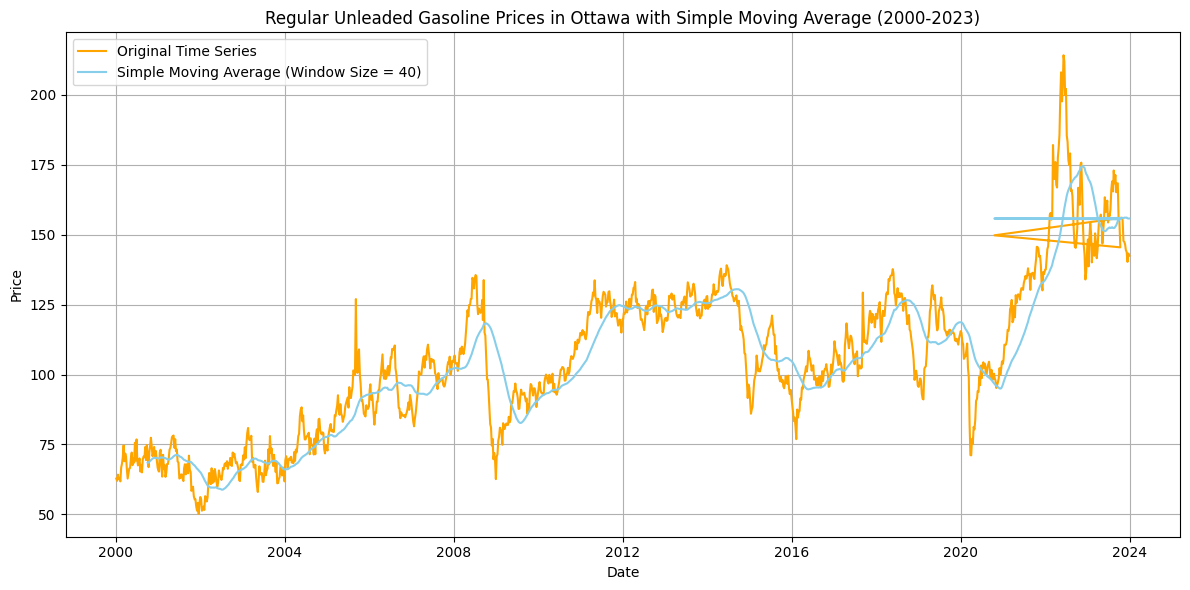

In [12]:
# write your code here
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('energy-price.csv')

# Filter data for Regular Unleaded Gasoline in Ottawa from 2000 to 2023
df['Date'] = pd.to_datetime(df['Date'])
df_ottawa = df[(df['Date'].dt.year >= 2000) & (df['Date'].dt.year <= 2023) & (df['Fuel Type'] == 'Regular Unleaded Gasoline') & (df['Ottawa'] != 0)]
gasoline_prices_ottawa = df_ottawa['Ottawa']

# Calculate the simple moving average with a window size of 40
rolling_mean = gasoline_prices_ottawa.rolling(window=40).mean()

# Plot the time series and its trend
plt.figure(figsize=(12, 6))
plt.plot(df_ottawa['Date'], gasoline_prices_ottawa, label='Original Time Series', color='orange')
plt.plot(df_ottawa['Date'], rolling_mean, label='Simple Moving Average (Window Size = 40)', color='skyblue')
plt.title('Regular Unleaded Gasoline Prices in Ottawa with Simple Moving Average (2000-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [ ]:
import pandas as pd
import geopandas 

## volcanoes in the world
volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
## world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
## earthquakes in Canada
earthquake = pd.read_csv('data/earthquake.txt',sep='|')

C:\Users\Charnel\AppData\Local\Temp\ipykernel_6360\2109632187.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Charnel\AppData\Local\Temp\ipykernel_6360\2109632187.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


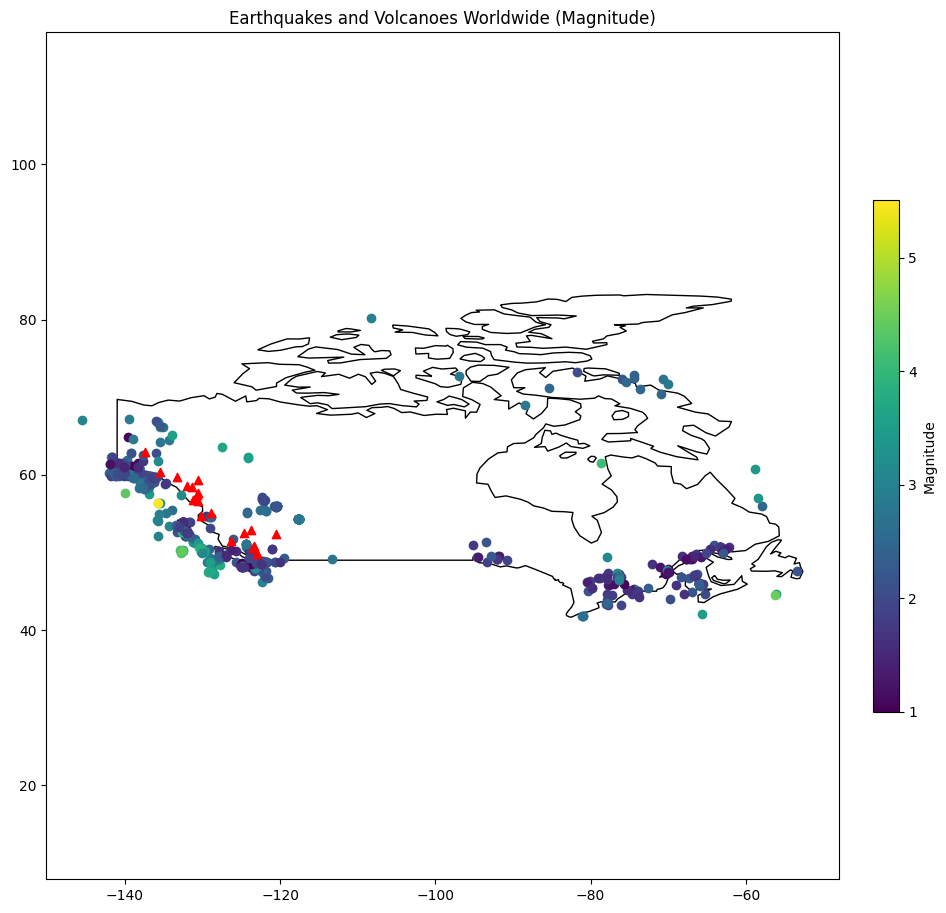

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from shapely.geometry import Point

# Read the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot Canada
canada = world[world.name == 'Canada']
plt_map = canada.plot(color='white', edgecolor='black', figsize=(11, 11))

# Read earthquake data and plot magnitude with color
earthquake_data = pd.read_csv('earthquake.txt', sep='|')
norm = Normalize(vmin=earthquake_data['Magnitude'].min(), vmax=earthquake_data['Magnitude'].max())
cmap = plt.cm.get_cmap('viridis')
mapper = ScalarMappable(norm=norm, cmap=cmap)
for idx, row in earthquake_data.iterrows():
    plt_map.scatter(row['Longitude'], row['Latitude'], color=mapper.to_rgba(row['Magnitude']), marker='o', zorder=5)

# Read volcano data
volcano_data = pd.read_csv('volcano_db.csv', encoding='latin-1')
volcano_geometry = [Point(xy) for xy in zip(volcano_data['Longitude'], volcano_data['Latitude'])]
volcano_gdf = gpd.GeoDataFrame(volcano_data, geometry=volcano_geometry)
volcano_gdf = volcano_gdf[volcano_gdf.geometry.within(canada.geometry.values[0])]

# Plot volcanoes
for idx, row in volcano_gdf.iterrows():
    plt_map.scatter(row['Longitude'], row['Latitude'], color='red', marker='^', zorder=10)

color_bar = plt.colorbar(mapper, ax=plt_map, orientation='vertical', fraction=0.03, pad=0.04)
color_bar.set_label('Magnitude')
plt.title('Earthquakes and Volcanoes Worldwide (Magnitude)')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()